In [2]:
from mp_api.client import MPRester
from pymatgen.analysis.diffraction.xrd import XRDCalculator
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

my_api='KPRwPqRju8WONO1AJTnZzBDOjSeNzjzy'
with MPRester(api_key=my_api) as mpr:
    # 首先检索相关结构
    structure = mpr.get_structure_by_material_id('mp-22856')

# 使用常规结构很重要，以确保峰用常规米勒指数标记
sga = SpacegroupAnalyzer(structure)
conventional_structure = sga.get_conventional_standard_structure()

# 该示例显示如何获取XRD衍射图案
# 这些图案从结构实时计算而来
calculator = XRDCalculator(wavelength='CuKa')
pattern = calculator.get_pattern(conventional_structure)
pattern

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

DiffractionPattern
$2\Theta$: [11.00395366 15.28489813 15.88162461 17.23757747 17.63876828 22.11104965
 23.63963625 24.37443616 24.87300442 25.14002335 27.09466588 28.08626798
 28.27156937 28.50896277 28.52436389 30.85055694 31.56089817 32.07901562
 32.88692466 33.02075498 33.22804834 33.4334722  33.80864403 34.8814705
 35.71375396 36.11185052 36.45047255 38.35915898 39.23182578 39.40995601
 39.70214598 39.84977976 40.17287673 40.52218821 41.18487662 41.7579357
 42.20487237 42.4750297  43.4429888  45.10382906 45.37102023 45.71310717
 45.97247161 46.10369422 46.12925133 46.60214678 46.8330017  47.0122
 47.02787852 47.29552863 47.7706715  48.15328666 48.21204435 48.36811774
 48.88311307 48.96939294 49.04250569 49.33106766 49.63768844 49.94882634
 50.84263271 51.02589021 51.22712131 51.60429491 51.68826479 51.78149683
 52.16562612 52.57045833 52.59314417 52.60758276 53.29265118 53.43331668
 54.21446962 54.46109938 54.76911555 55.02303186 55.3125227  55.87357464
 56.14195054 56.50507565 56

In [5]:
z = pattern.hkls
x = pattern.x
y = pattern.y
x2 = np.array([x,y])
a = pd.DataFrame(x,columns=['2theta'])
a['intensity'] = y
a
index = a[a['2theta'] ==a['2theta'] ].index.tolist() 



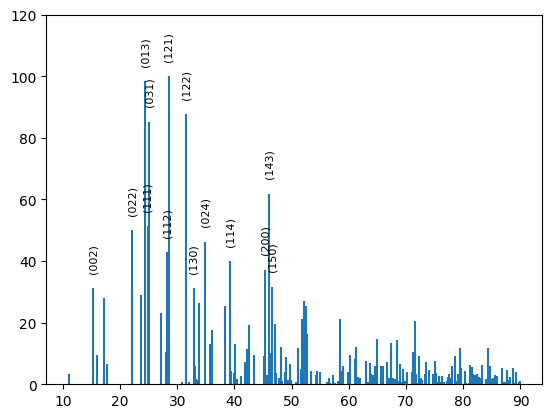

In [27]:
x = a['2theta']
y = a['intensity']
plt.vlines(x,0,y)
#plt.scatter(x, y, marker="x", )
plt.ylim(0,120)
for i in x:
    j = a[a['2theta'] == i ].index.tolist()[0] 
    r=''
    for k in range(3):
        r += str(z[j][0]['hkl'][k])
    if y[j]>30:
        plt.annotate(f"({r})", xy=(x[j], y[j]), xytext=(i,y[j]+5),ha = 'center',va = 'bottom',fontsize =8,rotation=90)
    